# Cohort Analysis for identifying Customer Retention for an e-commerce site

In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ecommerce-data/data.csv


## Loading the dataset

In [29]:
df=pd.read_csv('/kaggle/input/ecommerce-data/data.csv',encoding='ISO-8859-1')
df.shape

(541909, 8)

## Cleaning the Dataset

### Handling the null values-rows with null values in invoice date and customer id were dropped

In [20]:
df=df.dropna(subset=['InvoiceDate','CustomerID'])
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### Converting the Invoice date column to datetime datatype.Sorting the dataset by customerid and invoicedate

In [21]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
data = df.sort_values(by=['CustomerID', 'InvoiceDate'])

## Making cohorts based on first purchase month

In [22]:
df['first_purchase'] = data.groupby('CustomerID')['InvoiceDate'].transform('min')
df['cohort'] = df['first_purchase'].dt.to_period('M')
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,first_purchase,cohort
295127,562772,22629,SPACEBOY LUNCH BOX,3,2011-08-09 12:07:00,1.95,13097.0,United Kingdom,2010-12-14 15:13:00,2010-12
72846,542268,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-01-27 08:30:00,4.95,15358.0,United Kingdom,2010-12-09 10:04:00,2010-12
438911,574341,21070,VINTAGE BILLBOARD MUG,432,2011-11-04 10:09:00,0.80,18102.0,United Kingdom,2010-12-07 16:42:00,2010-12
334151,566233,23144,ZINC T-LIGHT HOLDER STARS SMALL,12,2011-09-11 11:04:00,0.83,12635.0,Germany,2011-07-08 08:43:00,2011-07
175293,551950,85053,FRENCH ENAMEL CANDLEHOLDER,6,2011-05-05 11:38:00,2.10,14911.0,EIRE,2010-12-01 14:05:00,2010-12


## Calculating subsequent purchase after first purchase(in months)

In [23]:
cohort_data = df.groupby(['cohort', df['InvoiceDate'].dt.to_period('M')])['CustomerID'].nunique().reset_index()

cohort_data['cohort_index'] = (cohort_data['InvoiceDate'].dt.year - cohort_data['cohort'].dt.year) * 12 + (cohort_data['InvoiceDate'].dt.month - cohort_data['cohort'].dt.month)

## Creating Pivot Table

In [ ]:
cohort_pivot = cohort_data.pivot_table(index='cohort', columns='cohort_index', values='CustomerID')
cohort_size = cohort_pivot.iloc[:, 0]

## Calculating retention rates for each cohort in subsequent months

In [ ]:
retention = cohort_pivot.divide(cohort_size, axis=0)

## Visualising the retention rates

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

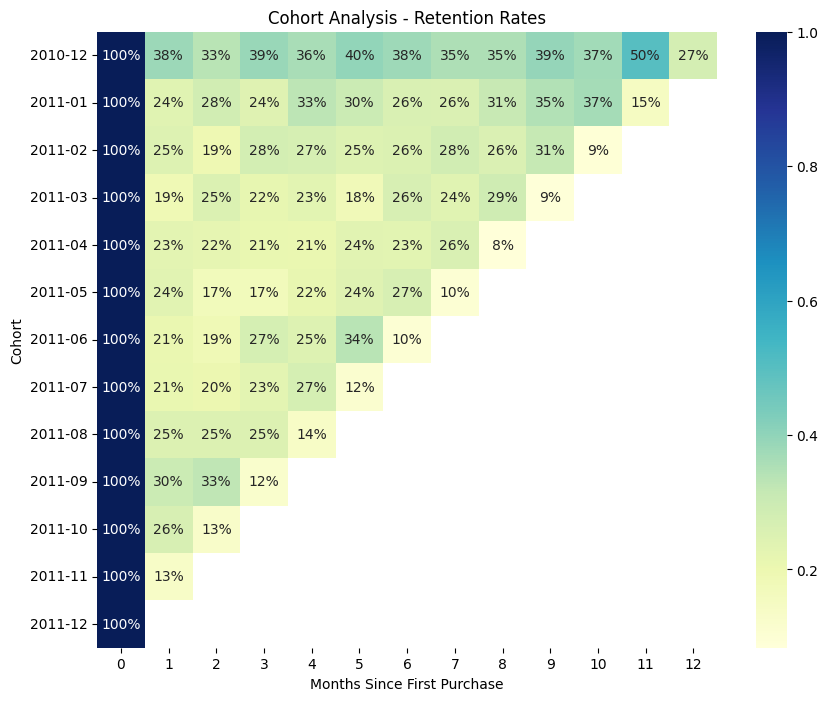

In [27]:
plt.figure(figsize=(10, 8))
sns.heatmap(retention, annot=True, fmt='.0%', cmap='YlGnBu')
plt.title("Cohort Analysis - Retention Rates")
plt.ylabel('Cohort')
plt.xlabel('Months Since First Purchase')
plt.show()